# **Introducción a TensorFlow**

TensorFlow es una biblioteca de código abierto desarrollada por Google para computación numérica y aprendizaje automático a gran escala. Proporciona una plataforma flexible y eficiente para construir y entrenar modelos de aprendizaje automático y redes neuronales profundas.

A continuación, se presenta un tutorial paso a paso que cubre las características destacables de TensorFlow, desde la creación de tensores hasta el entrenamiento de modelos.

## **1. Creación de Tensores**

Los tensores son la estructura de datos básica en TensorFlow. Pueden ser escalares, vectores, matrices o tensores de dimensiones superiores.

In [1]:
import tensorflow as tf

# Escalar (tensor de cero dimensiones)
escalar = tf.constant(7)
print("Escalar:", escalar)

# Vector (tensor de una dimensión)
vector = tf.constant([1.0, 2.0, 3.0])
print("Vector:", vector)

# Matriz (tensor de dos dimensiones)
matriz = tf.constant([[1, 2], [3, 4]])
print("Matriz:", matriz)

# Tensor de dimensiones superiores
tensor = tf.constant([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])
print("Tensor:", tensor)

Escalar: tf.Tensor(7, shape=(), dtype=int32)
Vector: tf.Tensor([1. 2. 3.], shape=(3,), dtype=float32)
Matriz: tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32)
Tensor: tf.Tensor(
[[[1 2]
  [3 4]]

 [[5 6]
  [7 8]]], shape=(2, 2, 2), dtype=int32)


## **2. Operaciones Básicas con Tensores**

Puedes realizar operaciones matemáticas con tensores, como suma, resta, multiplicación, etc.

In [2]:
a = tf.constant([1, 2, 3])
b = tf.constant([4, 5, 6])

# Suma
suma = tf.add(a, b)
print("Suma:", suma)

# Multiplicación
multiplicacion = tf.multiply(a, b)
print("Multiplicación:", multiplicacion)

# Producto matricial
matriz1 = tf.constant([[1, 2], [3, 4]])
matriz2 = tf.constant([[5, 6], [7, 8]])
producto = tf.matmul(matriz1, matriz2)
print("Producto Matricial:", producto)

Suma: tf.Tensor([5 7 9], shape=(3,), dtype=int32)
Multiplicación: tf.Tensor([ 4 10 18], shape=(3,), dtype=int32)
Producto Matricial: tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


## **3. Gradientes y Auto-Diferenciación**

TensorFlow permite calcular gradientes automáticamente utilizando `tf.GradientTape`. Esto es útil para el entrenamiento de modelos mediante optimización basada en gradientes.

In [3]:
# Definimos una variable
x = tf.Variable(3.0)

# Abrimos un contexto de GradientTape: es donde se calculan los gradientes
with tf.GradientTape() as tape:
    # Calculamos la función para la cual queremos el gradiente
    y = x ** 2

# Calculamos el gradiente de y respecto a x
gradiente = tape.gradient(y, x)
print("El gradiente de y respecto a x en x=3.0 es:", gradiente.numpy())

El gradiente de y respecto a x en x=3.0 es: 6.0


## **4. Construcción de un Modelo de Regresión Lineal**

Ahora, veamos un ejemplo completo de cómo construir y entrenar un modelo sencillo usando TensorFlow: una regresión lineal.

Este ejemplo está hecho "a mano"!!!

In [4]:
import tensorflow as tf
import numpy as np

# Generamos datos de ejemplo
# y = 2x + 1 + ruido
X = np.linspace(0, 10, 100)
ruido = np.random.randn(*X.shape) * 0.5
Y = 2 * X + 1 + ruido

# Convertimos los datos a tensores
X = tf.constant(X, dtype=tf.float32)
Y = tf.constant(Y, dtype=tf.float32)

# Definimos variables para los parámetros del modelo
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

# Definimos el número de épocas y la tasa de aprendizaje
epochs = 100
learning_rate = 0.01

# Entrenamiento del modelo
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        # Calculamos las predicciones
        Y_pred = W * X + b
        # Calculamos el error (función de pérdida)
        loss = tf.reduce_mean(tf.square(Y - Y_pred))
    # Calculamos los gradientes respecto a W y b
    gradients = tape.gradient(loss, [W, b])
    # Actualizamos los parámetros usando el optimizador SGD
    W.assign_sub(learning_rate * gradients[0])
    b.assign_sub(learning_rate * gradients[1])

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}: pérdida = {loss.numpy()}, W = {W.numpy()}, b = {b.numpy()}")

print(f"\nModelo entrenado: Y = {W.numpy()[0]} * X + {b.numpy()[0]}")

Epoch 10: pérdida = 0.2812432050704956, W = [2.0178018], b = [0.9052763]
Epoch 20: pérdida = 0.28030240535736084, W = [2.0163846], b = [0.9148339]
Epoch 30: pérdida = 0.27945074439048767, W = [2.0150177], b = [0.9239248]
Epoch 40: pérdida = 0.278679758310318, W = [2.0137172], b = [0.93257433]
Epoch 50: pérdida = 0.27798184752464294, W = [2.0124798], b = [0.9408039]
Epoch 60: pérdida = 0.2773500382900238, W = [2.0113022], b = [0.948634]
Epoch 70: pérdida = 0.2767781913280487, W = [2.0101821], b = [0.956084]
Epoch 80: pérdida = 0.27626028656959534, W = [2.0091164], b = [0.96317244]
Epoch 90: pérdida = 0.27579158544540405, W = [2.0081022], b = [0.9699167]
Epoch 100: pérdida = 0.27536728978157043, W = [2.0071375], b = [0.9763336]

Modelo entrenado: Y = 2.0071375370025635 * X + 0.9763336181640625


## **5. Uso de Keras para Construir y Entrenar Modelos**

TensorFlow incluye Keras, una API de alto nivel para construir y entrenar modelos de forma más sencilla.

In [5]:
import tensorflow as tf
import numpy as np

# Generamos datos de ejemplo
X = np.linspace(0, 10, 100)
ruido = np.random.randn(*X.shape) * 0.5
Y = 2 * X + 1 + ruido

# Construimos el modelo usando Keras
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,)) # Capa densa con una neurona
])

# Compilamos el modelo
model.compile(optimizer='sgd', loss='mean_squared_error') 
# sgd = Stochastic Gradient Descent (Descenso de Gradiente Estocástico) --> Lo veremos más adelante, en el tema 5
# mean_squared_error = Error Cuadrático Medio

# Entrenamos el modelo
model.fit(X, Y, epochs=100, verbose=0)

# Obtenemos los parámetros entrenados
W, b = model.layers[0].get_weights()
print(f"\nModelo entrenado: Y = {W[0][0]} * X + {b[0]}")

C:\Users\juano\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Modelo entrenado: Y = 2.034008264541626 * X + 0.8488515019416809


## **6. Construcción de una Red Neuronal para Clasificación**

Veamos un ejemplo de cómo construir una red neuronal para resolver un problema de clasificación utilizando el conjunto de datos MNIST.

Tamaño del conjunto de entrenamiento: (60000, 28, 28)
Tamaño del conjunto de prueba: (10000, 28, 28)


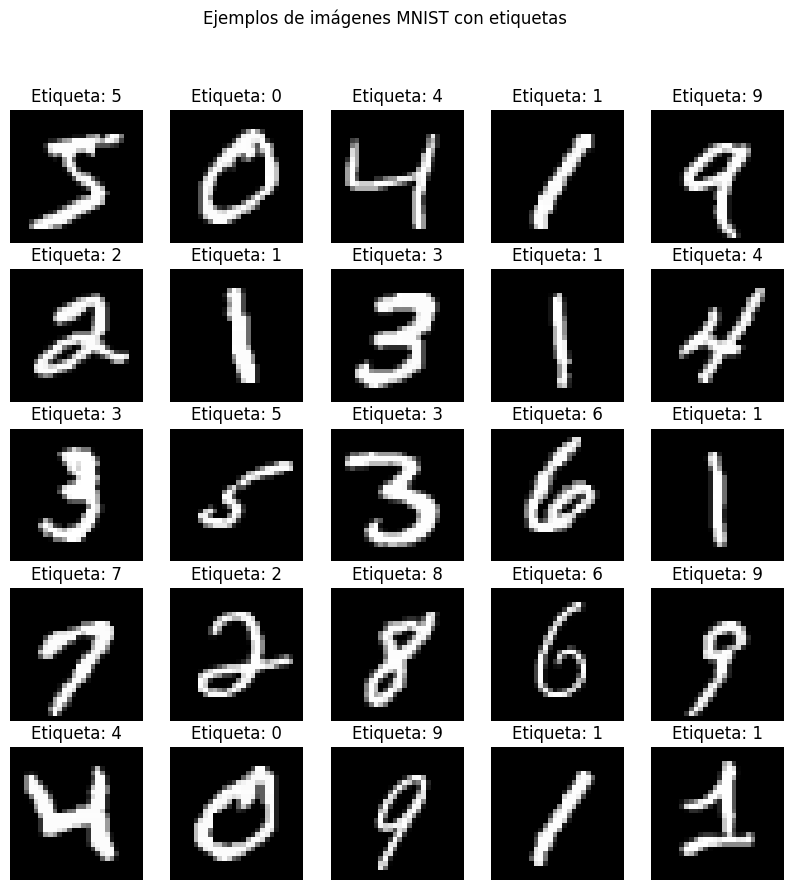

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Cargamos el conjunto de datos MNIST
mnist = tf.keras.datasets.mnist

# Dividimos los datos en entrenamiento y prueba
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalizamos los datos
X_train = X_train / 255.0
X_test = X_test / 255.0

# Mostramos el tamaño de los datasets
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

# Mostramos una matriz de 5x5 ejemplos de imágenes con sus etiquetas
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
fig.suptitle("Ejemplos de imágenes MNIST con etiquetas")
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"Etiqueta: {y_train[i]}")
    ax.axis('off')
plt.show()

In [7]:
# Construimos el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # Aplanamos las imágenes
    tf.keras.layers.Dense(128, activation='relu'),  # Capa oculta con activación ReLU
    tf.keras.layers.Dense(10, activation='softmax') # Capa de salida con softmax para clasificación
])

# Compilamos el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(X_train, y_train, epochs=5)

# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nPérdida en test: {loss}")
print(f"Precisión en test: {accuracy}")

Epoch 1/5


C:\Users\juano\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.8800 - loss: 0.4273
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 849us/step - accuracy: 0.9629 - loss: 0.1223
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 844us/step - accuracy: 0.9769 - loss: 0.0765
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 852us/step - accuracy: 0.9836 - loss: 0.0526
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 859us/step - accuracy: 0.9877 - loss: 0.0417
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.9722 - loss: 0.0889

Pérdida en test: 0.07669886201620102
Precisión en test: 0.9761999845504761


## Probemos el modelo con algunos ejemplos

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


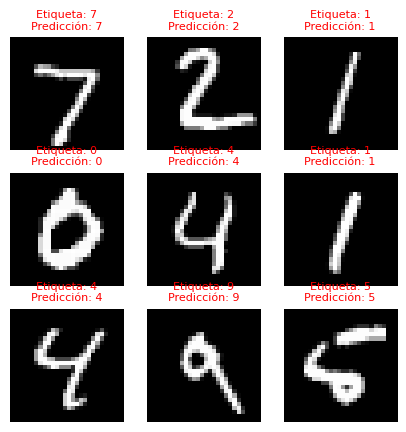

In [8]:
import matplotlib.pyplot as plt

# Probamos el modelo sobre algunos ejemplos de imágenes
fig, axes = plt.subplots(3, 3, figsize=(5, 5))
fig.suptitle("")
for i, ax in enumerate(axes.flat):
    img = X_test[i]
    ax.imshow(img, cmap='gray')
    img = img.reshape(1, 28, 28)
    prediction = model.predict(img)
    predicted_label = tf.argmax(prediction, axis=1).numpy()[0]
    ax.set_title(f"Etiqueta: {y_test[i]}\nPredicción: {predicted_label}", fontsize=8, color="red")
    ax.axis('off')
plt.show()


## **7. Guardar y Cargar Modelos**

Puedes guardar modelos entrenados para usarlos más tarde o para continuar su entrenamiento.

In [9]:
# Guardamos el modelo
model.save('modelo_mnist.h5')

# Cargamos el modelo
nuevo_modelo = tf.keras.models.load_model('modelo_mnist.h5')

# Verificamos que el modelo cargado funciona correctamente
loss, accuracy = nuevo_modelo.evaluate(X_test, y_test)
print(f"\nPrecisión del modelo cargado: {accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.9722 - loss: 0.0889

Precisión del modelo cargado: 0.9761999845504761
